# Modèles de covariance et processus gaussien


## Exemple : le modèle exponentiel carré anisotrope

Le modèle exponentiel carré anisotrope est la fonction de covariance définie par :
$$
k(\boldsymbol{x}, \boldsymbol{x'}) 
= \sigma^2 \exp\left( -\frac{1}{2} \left\|\frac{\boldsymbol{x}-\boldsymbol{x'}}{\boldsymbol{\theta}}\right\|_2^2\right)
$$
pour tous $\boldsymbol{x},\boldsymbol{x'} \in \mathcal{D}$, 
où la division entre le vecteur $\boldsymbol{x}-\boldsymbol{x'}$ au numérateur et le vecteur $\boldsymbol{\theta}$ au dénominateur est la division composante par composante :
$$
{\left(\frac{\boldsymbol{x}-\boldsymbol{x'}}{\boldsymbol{\theta}}\right)}_i
= \frac{x_i-{x'}_i}{\theta_i},
$$
pour $i=1,...,d$.

Si toutes les composantes du vecteur d'hyperparamètres $\boldsymbol{\theta}\in\mathbb{R}^d$ sont égales alors le modèle est *isotrope* (même comportement dans chacune des $d$ dimensions/directions du domaine $\mathcal{D}$), sinon il est *anisotrope*. 

La classe `SquaredExponential` permet de construire des modèles de covariances de ce type :
* le paramètre $\sigma\in\mathbb{R}$ est le paramètre d'amplitude,
* le paramètre $\boldsymbol{\theta}\in\mathbb{R}^d$ est le paramètre d'échelle.

In [1]:
import openturns as ot

In [2]:
# Amplitude values
amplitude = [3.5]
# Scale values
scale = [1.5]
# Covariance model
myModel = ot.SquaredExponential(scale, amplitude)

## Les processus gaussiens dans OpenTURNS

Pour créer un processus gaussien avec la classe `GaussianProcess`, il faut disposer 
* d'un modèle de covariance,
* d'un maillage.

De manière optionnelle, on peut considérer, en complément, une tendance (nous verrons comment le faire par la suite). Par défaut, le processus gaussien dans OpenTURNS est associé à une tendance nulle. 

Considérons le domaine $\mathcal{D}=[\underline{x},\:\bar{x}]$ où $\underline{x}=0$ et $\bar{x}=10$. 

Nous discrétisons ce domaine avec une grille régulière contenant $n=100$ mailles (et $n+1$ nœuds) par pas de $0.1$ à partir de $\underline{x}=0$ : 
$$
(x_0=\underline{x}=0,\:x_1=0.1,\:\ldots,\:x_n=\bar{x}=10).
$$

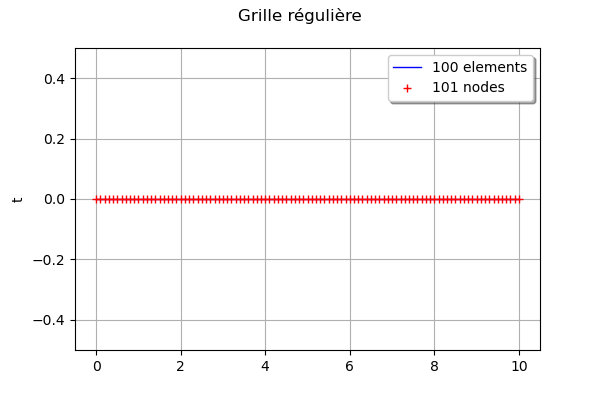

In [3]:
xmin = 0.0
step = 0.1
n = 100
myTimeGrid = ot.RegularGrid(xmin, step, n + 1)
graph = myTimeGrid.draw()
graph.setTitle("Grille régulière")
graph

Puis on crée le processus. Par défaut, la tendance est nulle.

In [4]:
process = ot.GaussianProcess(myModel, myTimeGrid)
print(process)

GaussianProcess(trend=[x0]->[0.0], covariance=SquaredExponential(scale=[1.5], amplitude=[3.5]))


On génère ensuite un ensemble de 10 trajectoires avec la méthode `getSample`. Ces trajectoires sont stockées dans un `ProcessSample`. 

In [5]:
nbTrajectories = 10
sample = process.getSample(nbTrajectories)
type(sample)

openturns.func.ProcessSample

Il est facile de dessiner ces trajectoires avec la méthode `drawMarginal`.

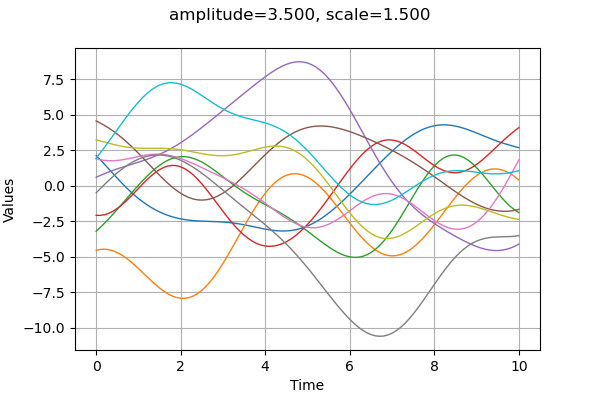

In [6]:
graph = sample.drawMarginal(0)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph

Pour faciliter le travail, on créée une fonction qui dessiner le nombre donné de trajectoires.

In [7]:
def plotCovarianceModel(myCovarianceModel, myTimeGrid, nbTrajectories):
    """Plots the given number of trajectories with given covariance model."""
    process = ot.GaussianProcess(myCovarianceModel, myTimeGrid)
    sample = process.getSample(nbTrajectories)
    graph = sample.drawMarginal(0)
    graph.setTitle("")
    return graph

Le paramètre d'amplitude caractérise la variance du processus. Une valeur plus grande implique des valeurs absolues plus élevées. 

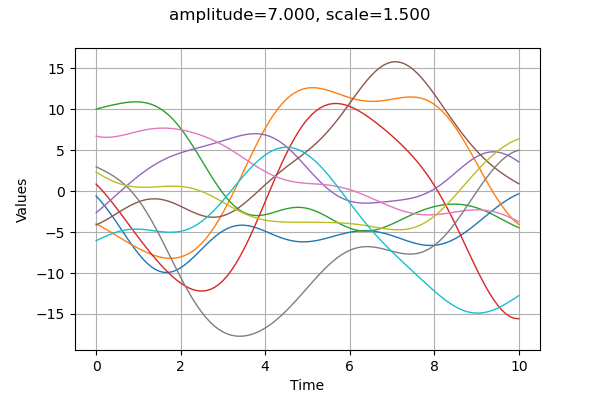

In [8]:
amplitude = [7.0]
scale = [1.5]
myModel = ot.SquaredExponential(scale, amplitude)
graph = plotCovarianceModel(myModel, myTimeGrid, 10)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph


Jouer sur l'unique paramètre d'échelle revient ici à dilater ou contracter le processus suivant le « temps » $x$. 

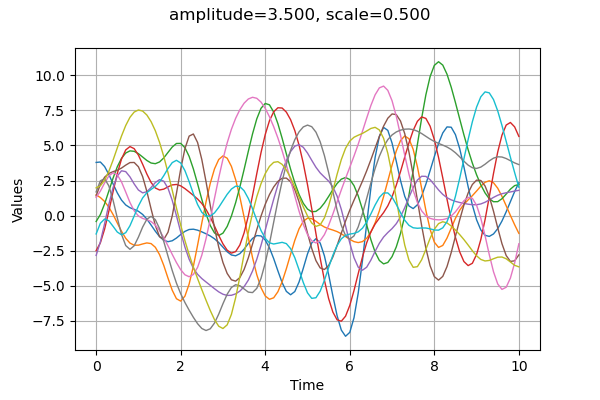

In [9]:
amplitude = [3.5]
scale = [0.5]
myModel = ot.SquaredExponential(scale, amplitude)
graph = plotCovarianceModel(myModel, myTimeGrid, 10)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph

## Définir la tendance

* La tendance est une fonction déterministe. 
* Avec la classe `GaussianProcess`, le processus ainsi créé est la somme d'une tendance et d'un processus gaussien de moyenne nulle. 



In [10]:
f = ot.SymbolicFunction(["x"], ["2*x"])
fTrend = ot.TrendTransform(f, myTimeGrid)

In [11]:
amplitude = [3.5]
scale = [1.5]
myModel = ot.SquaredExponential(scale, amplitude)
process = ot.GaussianProcess(fTrend, myModel, myTimeGrid)
print(process)

GaussianProcess(trend=[x]->[2*x], covariance=SquaredExponential(scale=[1.5], amplitude=[3.5]))


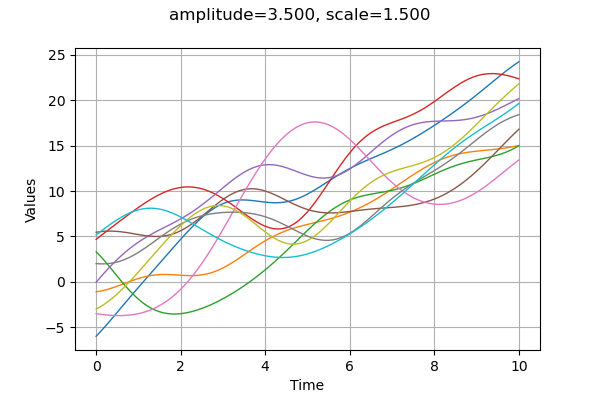

In [12]:
nbTrajectories = 10
sample = process.getSample(nbTrajectories)
graph = sample.drawMarginal(0)
graph.setTitle("amplitude=%.3f, scale=%.3f" % (amplitude[0], scale[0]))
graph

## Exercices

### Exercice 1 : noyau de Matérn et noyau exponentiel

Il y a d'autres modèles de covariances paramétriques dans OpenTURNS. Parmi les plus utilisés, on trouve :
* SquaredExponential. Certainement le plus utilisé. Ce modèle possède des dérivées à tous les ordres. Les processus gaussiens associés sont différentiables en moyenne quadratique à tous les ordres. 
* MaternModel. Le deuxième plus utilisé. Lorsque le paramètre $\nu\rightarrow+\infty$, converge vers le modèle exponentiel carré. Ce modèle est dérivable $k$ fois seulement si $k<\nu$. En d'autres termes, lorsque $\nu$ augmente, alors les trajectoires sont de plus en plus régulières. Le cas particulier $\nu=1/2$ est le modèle exponentiel.
* ExponentialModel. Le processus associé est continu, mais non différentiable.
* AbsoluteExponential
* GeneralizedExponential

**Questions**

* Pour les modèles de covariance suivants, dessiner 10 trajectoires en utilisant la fonction `plotCovarianceModel`.

In [13]:
amplitude = [1.0]
scale = [1.0]
nu1, nu2, nu3 = 2.5, 1.5, 0.5
myModel1 = ot.MaternModel(scale, amplitude, nu1)
myModel2 = ot.MaternModel(scale, amplitude, nu2)
myModel3 = ot.MaternModel(scale, amplitude, nu3)
#
myExpModel = ot.ExponentialModel(scale, amplitude)

* Quelle influence a le choix du modèle de covariance sur les trajectoires ?

### Solution de l'exercice 1 : noyau de Matérn et noyau exponentiel

In [14]:
nbTrajectories = 10
graph1 = plotCovarianceModel(myModel1, myTimeGrid, nbTrajectories)
graph2 = plotCovarianceModel(myModel2, myTimeGrid, nbTrajectories)
graph3 = plotCovarianceModel(myModel3, myTimeGrid, nbTrajectories)

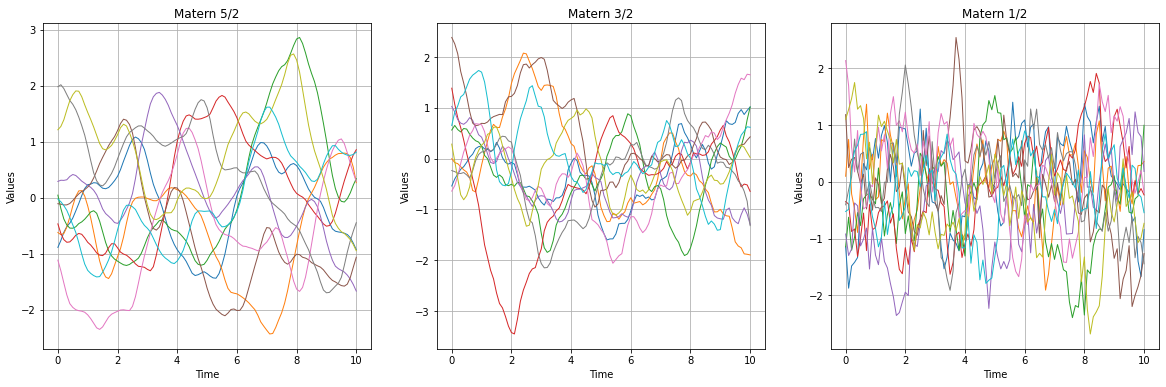

In [15]:
import pylab as pl
import openturns.viewer

fig = pl.figure(figsize=(20, 6))
ax1 = fig.add_subplot(1, 3, 1)
_ = ot.viewer.View(graph1, figure=fig, axes=[ax1])
_ = ax1.set_title("Matern 5/2")
ax2 = fig.add_subplot(1, 3, 2)
_ = ot.viewer.View(graph2, figure=fig, axes=[ax2])
_ = ax2.set_title("Matern 3/2")
ax3 = fig.add_subplot(1, 3, 3)
_ = ot.viewer.View(graph3, figure=fig, axes=[ax3])
_ = ax3.set_title("Matern 1/2")

On observe que, lorsque $\nu$ augmente, les trajectoires sont plus régulières. 

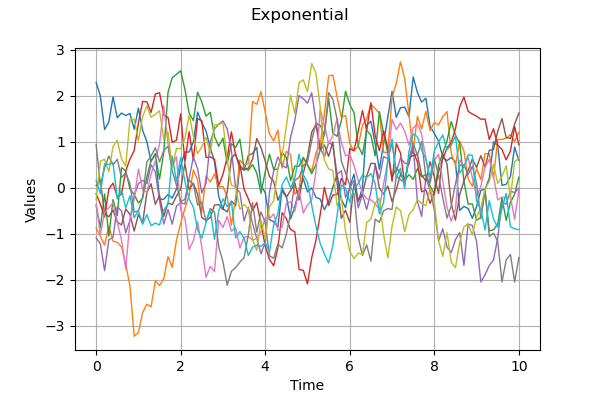

In [16]:
graph = plotCovarianceModel(myExpModel, myTimeGrid, nbTrajectories)
graph.setTitle("Exponential")
graph

On observe que le modèle exponentiel produit des trajectoires très irrégulières.

### Exercice 2 : matrice de covariance

La matrice de covariance discrétisée sur la grille est la matrice de covariance carrée, symétrique définie par :
$$
\Sigma = {\left(k(x_i,\:x_j)\right)}_{i,\,j=0,\,\ldots,\,n}
$$
où $n$ est le nombre de mailles. 

* Utiliser la méthode `discretize` du modèle de covariance pour évaluer la matrice de covariance discrétisée `Sigma`.
* Utiliser la méthode `getDimension` pour observer sa dimension.
* Utiliser la fonction `type` pour observer le type de la matrice.

### Solution de l'exercice 2 : matrice de covariance

In [17]:
amplitude = [3.5]
scale = [1.5]
myModel = ot.SquaredExponential(scale, amplitude)

In [18]:
Sigma = myModel.discretize(myTimeGrid)
Sigma.getDimension()

101

On observe que la matrice est de taille 101-par-101.

In [19]:
type(Sigma)

openturns.typ.CovarianceMatrix

In [20]:
Sigma[0:5, 0:5]

class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=5 columns=5 values=[12.25,12.2228,12.1416,12.0074,11.8221,12.2228,12.25,12.2228,12.1416,12.0074,12.1416,12.2228,12.25,12.2228,12.1416,12.0074,12.1416,12.2228,12.25,12.2228,11.8221,12.0074,12.1416,12.2228,12.25]

On observe que la matrice `Sigma` est une `CovarianceMatrix`. 

### Exercice 3 : générer des réalisations d'un vecteur gaussien

* Utiliser la classe `Normal` pour créer un vecteur Gaussien en dimension `n=101` de moyenne nulle et dont la matrice de covariance `Sigma` est celle de l'exercice précédent. 
* Utiliser la méthode `getSample` pour générer un échantillon de `nbTrajectories` trajectoires. 
* Dans quelles circonstances pourrait-il être coûteux de générer une trajectoire d'un processus gaussien ?

Pour colorer vos trajectoires, vous pouvez utiliser la fonction suivante.

In [21]:
def createHSVColor(indexCurve, maximumNumberOfCurves):
    """Create a HSV color for the indexCurve-th curve 
    from a sample with maximum size equal to maximumNumberOfCurves"""
    color = ot.Drawable.ConvertFromHSV(
        indexCurve * 360.0 / maximumNumberOfCurves, 1.0, 1.0
    )
    return color

### Solution de l'exercice 3 : générer des réalisations d'un vecteur gaussien

In [22]:
n = 100
mu = [0.0] * (n + 1)
myNormalVector = ot.Normal(mu, Sigma)

In [23]:
nbTrajectories = 10
trajectoires = myNormalVector.getSample(nbTrajectories)

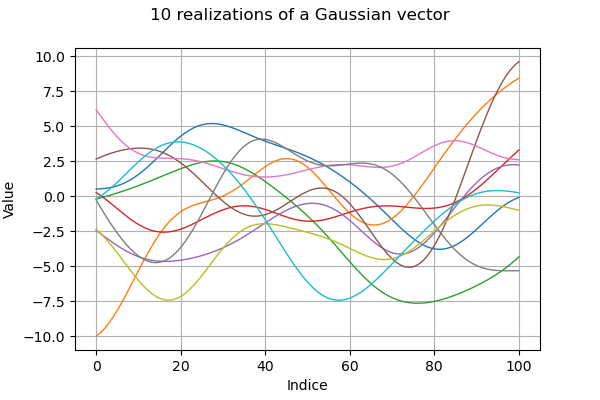

In [24]:
palette = ot.Drawable.BuildDefaultPalette(nbTrajectories)
mytitle = "%d realizations of a Gaussian vector" % (nbTrajectories)
graph = ot.Graph(mytitle, "Indice", "Value", True)
x = range(n + 1)
for i in range(nbTrajectories):
    curve = ot.Curve(x, trajectoires[i, :])
    graph.add(curve)
graph.setColors(palette)  # Add colors
graph

On observe que l'on a des trajectoires similaires aux trajectoires observées dans le cas d'un processus gaussien. 

* Les trajectoires sont très régulières. 
* L'amplitude de variation est bien identique à l'amplitude du processus gaussien.

C'est le résultat attendu, puisque chaque réalisation d'un processus gaussien *est* un vecteur gaussien. 

### Exercice 4 : processus gaussien et vecteur gaussien

Nous considérons toujours dans cet exercice la grille temporelle précédente $(x_0=0,\:x_1=0.1,\:\ldots,\:x_n=10)$ constitués de $n+1=101$ points.

Une propriété importante pour un processus gaussien $Z$ tel que ceux définis précédemment sur cette grille est que ${\left(Z_{x_0},\:\ldots,\:Z_{x_n}\right)}^T$ est un vecteur gaussien. L'objectif de cet exercice est de le vérifier expérimentalement.

* Générer `nbTrajectories=10000` trajectoires du processus gaussien associé à la grille temporelle précédente. En sortie, on obtient les trajectoires discrétisées ${\left(Z^j_{x_0},\:\ldots,\:Z^j_{x_n}\right)}^T$ pour tout $j=0,\,\ldots,\,nbTrajectories-1$.
* Choisissez un indice de maille $i$ entre $0$ et $n$, à votre convenance. 
* Pour la date $x_i$ correspondante, créer un échantillon contenant les valeurs des trajectoires à cette date particulière. En d'autres termes, créer l'échantillon des $Z^j(x_i)$, pour $j=0,...,nbTrajectories-1$.
* Utiliser la classe `HistogramFactory` pour dessiner une approximation de la distribution de cet échantillon par un histogramme. Qu'observez-vous ?
* Créer la variable gaussienne univariée associée au nœud $x_i$. Superposer l'histogramme empirique et la PDF de la gaussienne exacte. Qu'observez-vous ?
* Utiliser le test visuel de la droite de Henry sur l'échantillon.
* Si on ajoute une tendance au processus gaussien, comment doit-on modifier la variable gaussienne univariée associée ?
* Bonus : réaliser une analyse similaire avec un échantillon de dimension deux correspondant à $Z(x_i)$ et $Z(x_i)+Z(x_{i'})$ où $i'\neq{}i$.

### Solution de l'exercice 4 : processus gaussien et vecteur gaussien

In [25]:
# Modèle de covariance
amplitude = [3.5]
scale = [1.5]
myModel = ot.SquaredExponential(scale, amplitude)
# Grille temporelle
xmin = 0.0
step = 0.1
n = 100
myTimeGrid = ot.RegularGrid(xmin, step, n + 1)
# Processus Gaussien
process = ot.GaussianProcess(myModel, myTimeGrid)
process

class=GaussianProcess mesh=class=Mesh name=Unnamed dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=101 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9],[10]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99],[99,100]] trend=class=TrendTransform inherited from class=VertexValueFunction evaluation=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x0,y0] evaluationImplementation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-05,1e-05] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[0.0001,0.0001] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0] formulas=[0.0] covarianceModel=class=SquaredExponen

Nous allons stocker les valeurs de l'échantillons pour la maille i=30. Cela correspond à la date $x_i$.

In [26]:
i = 30
timeGridValues = myTimeGrid.getValues()
xi = timeGridValues[i]
xi

3.0

Pour visualiser la position de cette date dans la grille temporelle, nous générons 10 trajectoires puis nous traçons un trait vertical à la date $x_i=3$.

In [27]:
nbTrajectories = 10
sample = process.getSample(nbTrajectories)

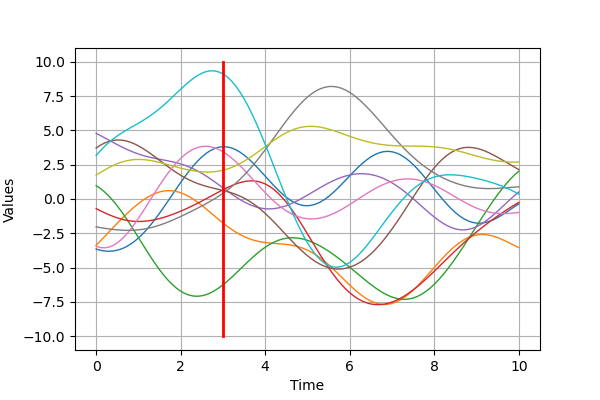

In [28]:
graph = sample.drawMarginal(0)
curve = ot.Curve([xi, xi], [-10, 10])
curve.setColor("red")
curve.setLineWidth(2)
graph.add(curve)
graph.setTitle("")
graph

Chaque trajectoire coupe la ligne verticale rouge à une valeur différente, certaines plus basses et d'autres plus hautes. Nous souhaitons observer l'échantillon des valeurs des trajectoires à la date $x_i$, c'est à dire l'échantillon  $Z^j(x_i)$, pour $j=0,...,nbTrajectories-1$. 

Pour le faire, nous générons plus de trajectoires.

In [29]:
nbTrajectories = 100
sample = process.getSample(nbTrajectories)

Dans chaque trajectoire d'indice j, extrait la valeur de la trajectoire à la i-ème date.

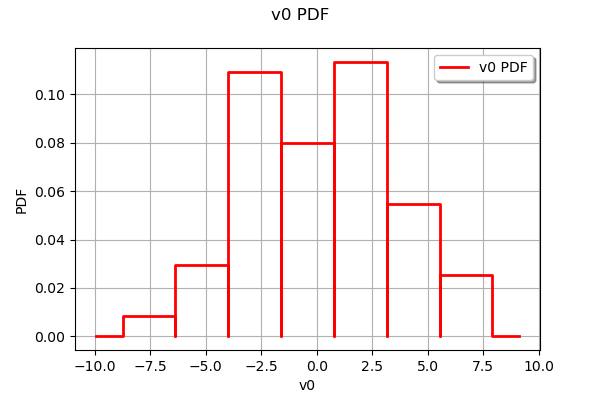

In [30]:
testSample = ot.Sample(nbTrajectories, 1)
for j in range(nbTrajectories):
    testSample[j] = sample[j][i]

ot.HistogramFactory().build(testSample).drawPDF()

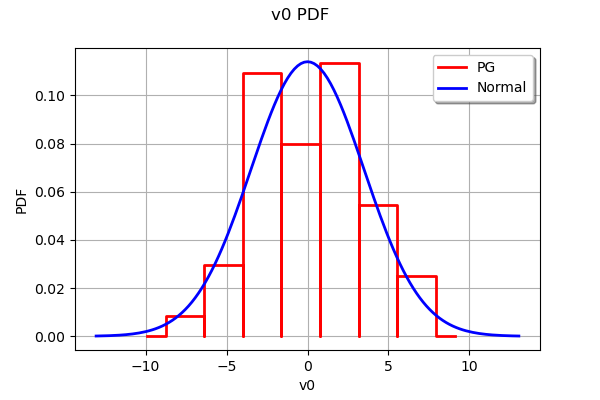

In [31]:
graph = ot.HistogramFactory().build(testSample).drawPDF()
graph.setLegends(["PG"])
# Loi normale attendue
N = ot.Normal(0.0, amplitude[0])
graphN = N.drawPDF()
graphN.setColors(["blue"])
graphN.setLegends(["Normal"])
graph.add(graphN)
graph

On observe que, à la date $x=3$ (i.e. la 30-ème date), l'échantillon des valeurs suit une loi gaussienne.

Pour le confirmer, nous dessinons la droite de Henry, qui est le QQ-Plot appliqué à la loi normale.

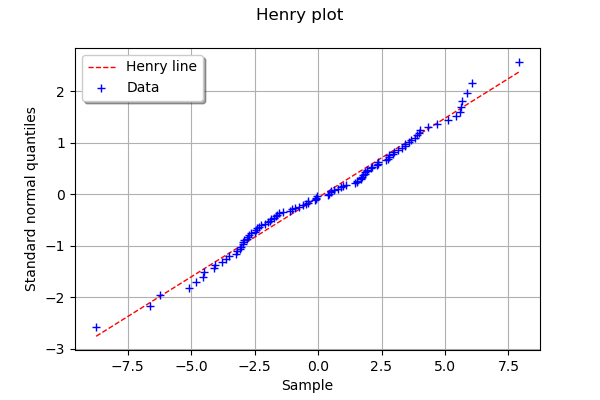

In [32]:
ot.VisualTest_DrawHenryLine(testSample)

Puisque les points sont proches de la droite, cela signifie que la distribution des points est gaussienne.